In [6]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from matplotlib.pyplot import imread, imshow, subplots, show
import random
import os
import time
import pathlib
import pandas as pd
import numpy as np
from sklearn import metrics
import tensorflow as tf
from tensorflow.keras import *

data_dir = pathlib.Path("101_food_classes_10_percent/test/")
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['beet_salad' 'escargots' 'mussels']


Image shape: (512, 382, 3)


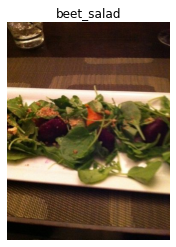

In [7]:
def view_random_image(target_dir, target_class):

    target_folder = target_dir+target_class

    random_image = random.sample(os.listdir(target_folder), 1)

    img = mpimg.imread(target_folder + "/" + random_image[0])
    plt.imshow(img)
    plt.title(target_class)
    plt.axis("off");

    print(f"Image shape: {img.shape}")

    return img

img = view_random_image(target_dir="101_food_classes_10_percent/test/",
                        target_class="beet_salad")

Image shape: (512, 511, 3)


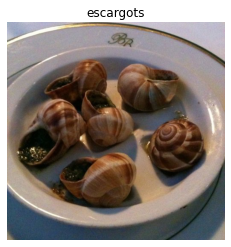

In [8]:
img = view_random_image(target_dir="101_food_classes_10_percent/test/",
                        target_class="escargots")

Image shape: (512, 512, 3)


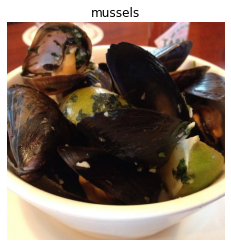

In [9]:
img = view_random_image(target_dir="101_food_classes_10_percent/test/",
                        target_class="mussels")

In [21]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D,Flatten,Dense,BatchNormalization,Dropout
from tensorflow.keras.optimizers import Adam

train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "101_food_classes_10_percent/test/"
test_dir = "101_food_classes_10_percent/train/"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

test_data = test_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="categorical",
                                               seed=42)

Found 750 images belonging to 3 classes.
Found 225 images belonging to 3 classes.


In [24]:
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3,
                         activation="relu",
                         input_shape=(224, 224, 3)),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2,
                            padding="valid"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.Conv2D(10, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(3, activation="softmax")
  ])

# Compile the model
model_1.compile(loss='categorical_crossentropy', optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
24/24 [==============================] - 21s 837ms/step - loss: 1.1975 - accuracy: 0.3187 - val_loss: 1.0948 - val_accuracy: 0.3511
Epoch 2/5
24/24 [==============================] - 20s 820ms/step - loss: 1.0679 - accuracy: 0.3413 - val_loss: 1.0442 - val_accuracy: 0.3733
Epoch 3/5
24/24 [==============================] - 22s 885ms/step - loss: 0.9826 - accuracy: 0.4507 - val_loss: 1.0220 - val_accuracy: 0.4311
Epoch 4/5
24/24 [==============================] - 21s 838ms/step - loss: 0.9402 - accuracy: 0.5493 - val_loss: 1.0110 - val_accuracy: 0.4667
Epoch 5/5
24/24 [==============================] - 18s 745ms/step - loss: 0.8793 - accuracy: 0.5853 - val_loss: 1.0460 - val_accuracy: 0.4889


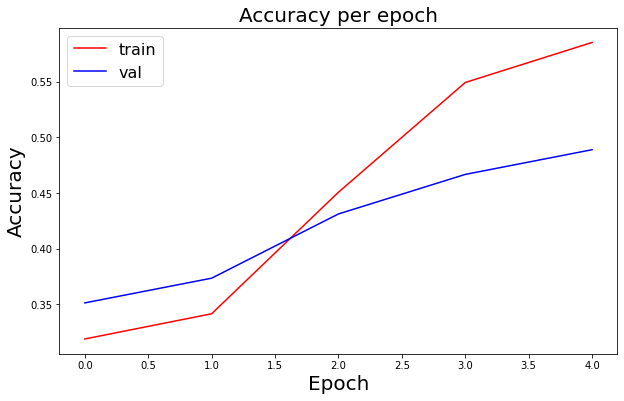

In [25]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1.history['accuracy'], 'r', label='train')
ax.plot(history_1.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [26]:
train_datagen_norm = ImageDataGenerator(rescale = 1/255.)
test_datagen_norm = ImageDataGenerator(rescale = 1/255.)

test_dir = "101_food_classes_10_percent/test/"
train_dir = "101_food_classes_10_percent/train/"

train_data_norm = train_datagen_norm.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="categorical", seed=42)

test_data_norm = test_datagen_norm.flow_from_directory(test_dir, batch_size=32, target_size=(224, 224), class_mode="categorical", seed=42)

Found 225 images belonging to 3 classes.
Found 750 images belonging to 3 classes.


In [27]:
tf.random.set_seed(42)
history_1_norm = model_1.fit(train_data_norm, epochs=5, validation_data=test_data_norm)

Epoch 1/5
8/8 [==============================] - 10s 1s/step - loss: 1.0318 - accuracy: 0.5244 - val_loss: 0.8181 - val_accuracy: 0.5893
Epoch 2/5
8/8 [==============================] - 10s 1s/step - loss: 0.9511 - accuracy: 0.5600 - val_loss: 0.8351 - val_accuracy: 0.6213
Epoch 3/5
8/8 [==============================] - 10s 1s/step - loss: 0.8545 - accuracy: 0.6178 - val_loss: 0.8570 - val_accuracy: 0.6093
Epoch 4/5
8/8 [==============================] - 11s 1s/step - loss: 0.9305 - accuracy: 0.5556 - val_loss: 0.8742 - val_accuracy: 0.5747
Epoch 5/5
8/8 [==============================] - 9s 1s/step - loss: 0.8024 - accuracy: 0.7067 - val_loss: 0.8580 - val_accuracy: 0.5693


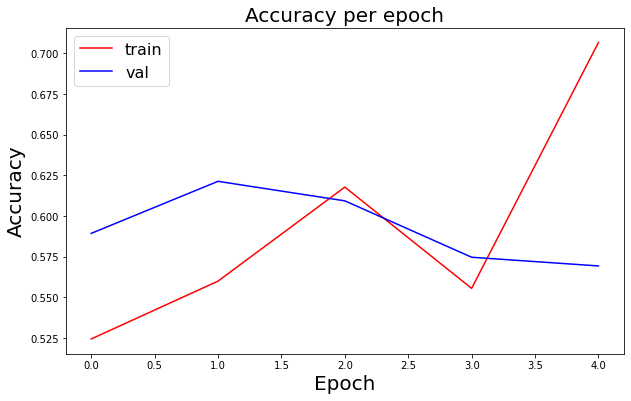

In [28]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1_norm.history['accuracy'], 'r', label='train')
ax.plot(history_1_norm.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [29]:
train_datagen_norm_aug = ImageDataGenerator(rescale = 1/255., horizontal_flip = True, brightness_range = (0.2, 0.4), shear_range = 0.2, zoom_range = 0.2, rotation_range = 0.3)

test_dir = "101_food_classes_10_percent/test/"
train_dir = "101_food_classes_10_percent/train/"

train_data_norm_aug = train_datagen_norm_aug.flow_from_directory(train_dir, batch_size=32, target_size=(224, 224), class_mode="categorical", seed=42)

Found 225 images belonging to 3 classes.


In [30]:
tf.random.set_seed(42)
first_model_time = time.time()
history_1_transform = model_1.fit(train_data_norm_aug, epochs=5, validation_data=test_data_norm)
time_1 = time.time() - first_model_time

Epoch 1/5
8/8 [==============================] - 10s 1s/step - loss: 0.9573 - accuracy: 0.5289 - val_loss: 1.2146 - val_accuracy: 0.4133
Epoch 2/5
8/8 [==============================] - 10s 1s/step - loss: 0.9250 - accuracy: 0.5378 - val_loss: 1.4325 - val_accuracy: 0.3987
Epoch 3/5
8/8 [==============================] - 12s 2s/step - loss: 0.8835 - accuracy: 0.6000 - val_loss: 0.9473 - val_accuracy: 0.5600
Epoch 4/5
8/8 [==============================] - 13s 2s/step - loss: 0.8804 - accuracy: 0.5778 - val_loss: 1.0763 - val_accuracy: 0.5387
Epoch 5/5
8/8 [==============================] - 13s 2s/step - loss: 0.8469 - accuracy: 0.6267 - val_loss: 1.5917 - val_accuracy: 0.4320


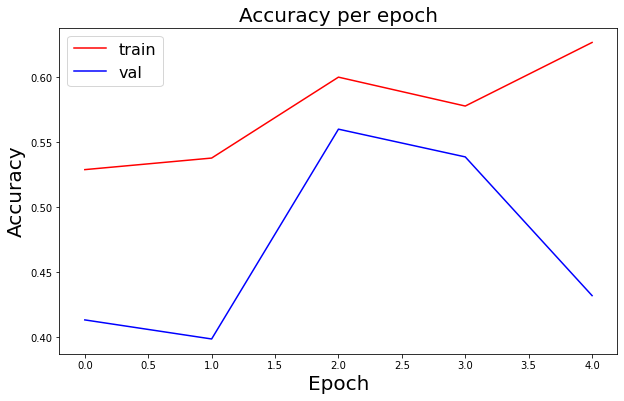

In [31]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_1_transform.history['accuracy'], 'r', label='train')
ax.plot(history_1_transform.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [32]:
tf.random.set_seed(42)
history_2_transform = model_1.fit(train_data_norm_aug, epochs=5, validation_data=test_data_norm)

Epoch 1/5
8/8 [==============================] - 10s 1s/step - loss: 0.8169 - accuracy: 0.6222 - val_loss: 1.9004 - val_accuracy: 0.3627
Epoch 2/5
8/8 [==============================] - 9s 1s/step - loss: 0.7470 - accuracy: 0.7022 - val_loss: 1.3670 - val_accuracy: 0.4480
Epoch 3/5
8/8 [==============================] - 9s 1s/step - loss: 0.8153 - accuracy: 0.6133 - val_loss: 2.2021 - val_accuracy: 0.3733
Epoch 4/5
8/8 [==============================] - 10s 1s/step - loss: 1.0858 - accuracy: 0.4844 - val_loss: 4.4111 - val_accuracy: 0.3267
Epoch 5/5
8/8 [==============================] - 12s 2s/step - loss: 1.2089 - accuracy: 0.3733 - val_loss: 0.9919 - val_accuracy: 0.4960


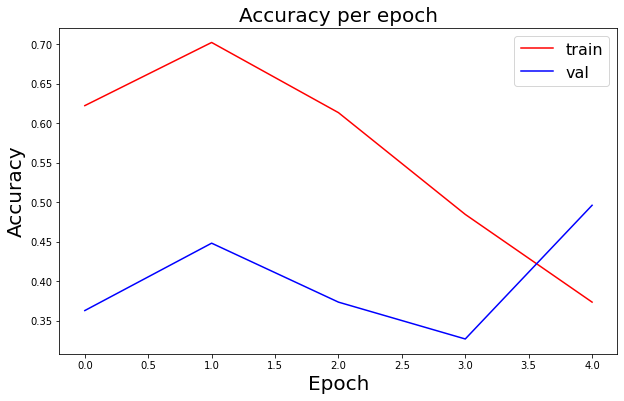

In [33]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_2_transform.history['accuracy'], 'r', label='train')
ax.plot(history_2_transform.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)

In [34]:
tf.random.set_seed(42)
model_drop = tf.keras.models.Sequential([
  Conv2D(filters=10, kernel_size=2, activation="relu", input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  MaxPool2D(2),
  Dropout(0.2),
  Flatten(),
  Dense(3, activation="softmax")])

model_drop.compile(loss="categorical_crossentropy", optimizer=tf.keras.optimizers.Adam(), metrics=["accuracy"])

tf.random.set_seed(42)
second_model_time = time.time()
history_drop = model_drop.fit(train_data_norm_aug, epochs=5, validation_data=test_data_norm)
time_2 = time.time() - second_model_time

Epoch 1/5
8/8 [==============================] - 9s 1s/step - loss: 1.7592 - accuracy: 0.2800 - val_loss: 6.4402 - val_accuracy: 0.3347
Epoch 2/5
8/8 [==============================] - 8s 1s/step - loss: 1.5290 - accuracy: 0.3778 - val_loss: 4.1058 - val_accuracy: 0.3707
Epoch 3/5
8/8 [==============================] - 8s 991ms/step - loss: 1.1014 - accuracy: 0.5244 - val_loss: 1.4665 - val_accuracy: 0.4960
Epoch 4/5
8/8 [==============================] - 8s 964ms/step - loss: 0.9913 - accuracy: 0.4622 - val_loss: 1.5134 - val_accuracy: 0.4653
Epoch 5/5
8/8 [==============================] - 9s 1s/step - loss: 0.9220 - accuracy: 0.5422 - val_loss: 3.2675 - val_accuracy: 0.3680


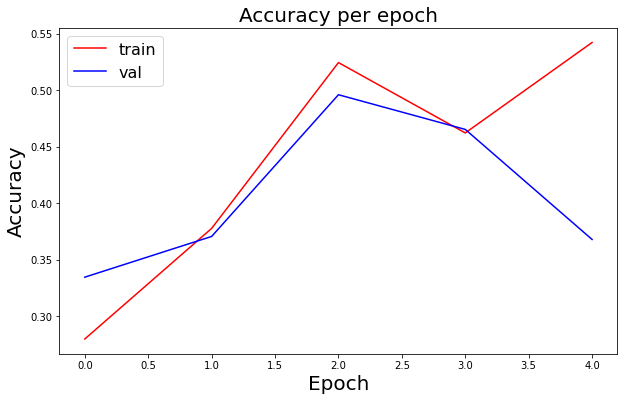

In [35]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))
ax.plot(history_drop.history['accuracy'], 'r', label='train')
ax.plot(history_drop.history['val_accuracy'], 'b' ,label='val')
ax.set_xlabel(r'Epoch', fontsize=20)
ax.set_ylabel(r'Accuracy', fontsize=20)
ax.legend()
plt.title("Accuracy per epoch", fontsize = 20)
plt.legend(prop={'size': 16})
ax.tick_params(labelsize=10)